##### import libary

In [1]:
import sys
sys.path.append("../../..")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy.cluster.hierarchy as sch
import utility

##### Read the FCGR data from excel for all the speceies in -log(X) scale truncated to four digit after decimel

In [3]:
df = pd.read_table('../../../data/all speceies FCGR in -log(x) scale truncated to four decimel.txt', sep=",")


##### fig FCGR heatmap 1a, 1b, 1c 

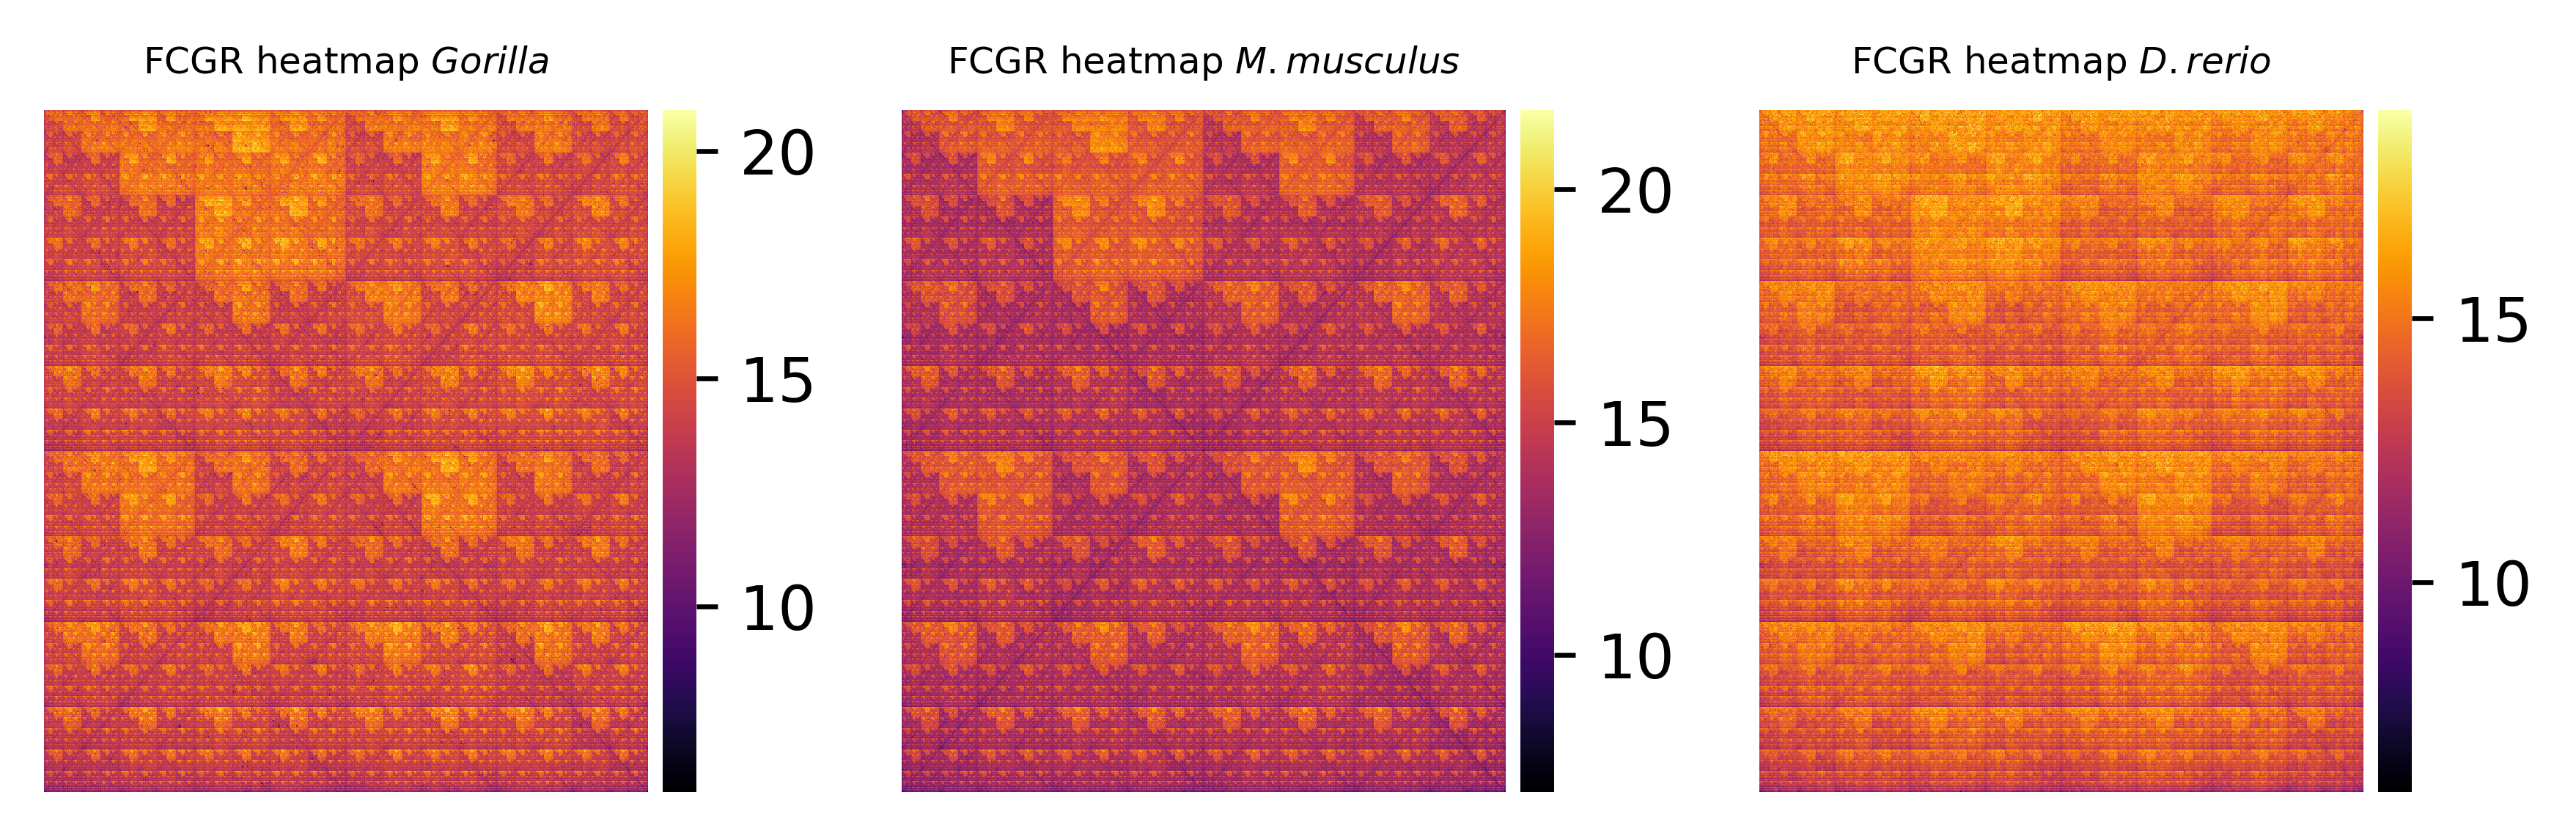

In [4]:
fig, ax = plt.subplots(1, 3, dpi = 600, figsize =(6, 2))

species = ["gorilla", "mouse", "zebra fish"]

counter = 0

for i in range(3):
    # for j in range(3):
    # print(species[counter])
    ax[i] = sns.heatmap(np.array(df[species[counter]]).reshape(1024,1024), ax=ax[i], cmap= "inferno", cbar_kws={'orientation': 'vertical', 'pad': 0.02})

    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].set_yticks([])
    ax[i].set_xticks([])

    ax[i] = utility.custom_figure_axis(ax=ax[i], fontsize = 6)
    counter= counter+1
    
    if(counter==3):
        break

ax[0].set_title("FCGR heatmap $\it{Gorilla}$" , fontsize = 6)
ax[1].set_title("FCGR heatmap $\it{M.musculus}$" , fontsize = 6)
ax[2].set_title("FCGR heatmap $\it{D.rerio}$" , fontsize = 6)

plt.tight_layout()

# plt.show()
# plt.savefig("all heatmap trial.png", dpi=600)

##### Obtain correlation between dataframe

In [5]:
df = df.corr()
df

yeast     ecoli  zebra fish  fruit fly  nematoda  chimpanzee  \
yeast       1.000000  0.172565    0.677765   0.623455  0.748408    0.564651   
ecoli       0.172565  1.000000    0.122116   0.322922  0.207974   -0.020161   
zebra fish  0.677765  0.122116    1.000000   0.652139  0.689265    0.773217   
fruit fly   0.623455  0.322922    0.652139   1.000000  0.727103    0.508029   
nematoda    0.748408  0.207974    0.689265   0.727103  1.000000    0.528342   
chimpanzee  0.564651 -0.020161    0.773217   0.508029  0.528342    1.000000   
gibbon      0.575224 -0.024123    0.780143   0.513013  0.537738    0.969016   
gorilla     0.575727 -0.019144    0.777174   0.512691  0.535952    0.977637   
mouse       0.574779 -0.059714    0.783667   0.486355  0.519869    0.929795   
orangutan   0.568493 -0.023402    0.774700   0.512063  0.534984    0.974042   
human       0.579155 -0.025825    0.788021   0.514421  0.538321    0.977536   

              gibbon   gorilla     mouse  orangutan     human  
yeast       0.575224  0.575727  0.574779   0.568493  0.579155  
ecoli      -0.024123 -0.019144 -0.059714  -0.023402 -0.025825  
zebra fish  0.780143  0.777174  0.783667   0.774700  0.788021  
fruit fly   0.513013  0.512691  0.486355   0.512063  0.514421  
nematoda    0.537738  0.535952  0.519869   0.534984  0.538321  
chimpanzee  0.969016  0.977637  0.929795   0.974042  0.977536  
gibbon      1.000000  0.964696  0.936138   0.974200  0.981119  
gorilla     0.964696  1.000000  0.930050   0.968063  0.976127  
mouse       0.936138  0.930050  1.000000   0.932880  0.949476  
orangutan   0.974200  0.968063  0.932880   1.000000  0.980529  
human       0.981119  0.976127  0.949476   0.980529  1.000000

In [6]:
# df.columns

##### fig 1d. Plot heatmap of correlation of kmer frequency species

/tmp/ipykernel_1258795/1000068336.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


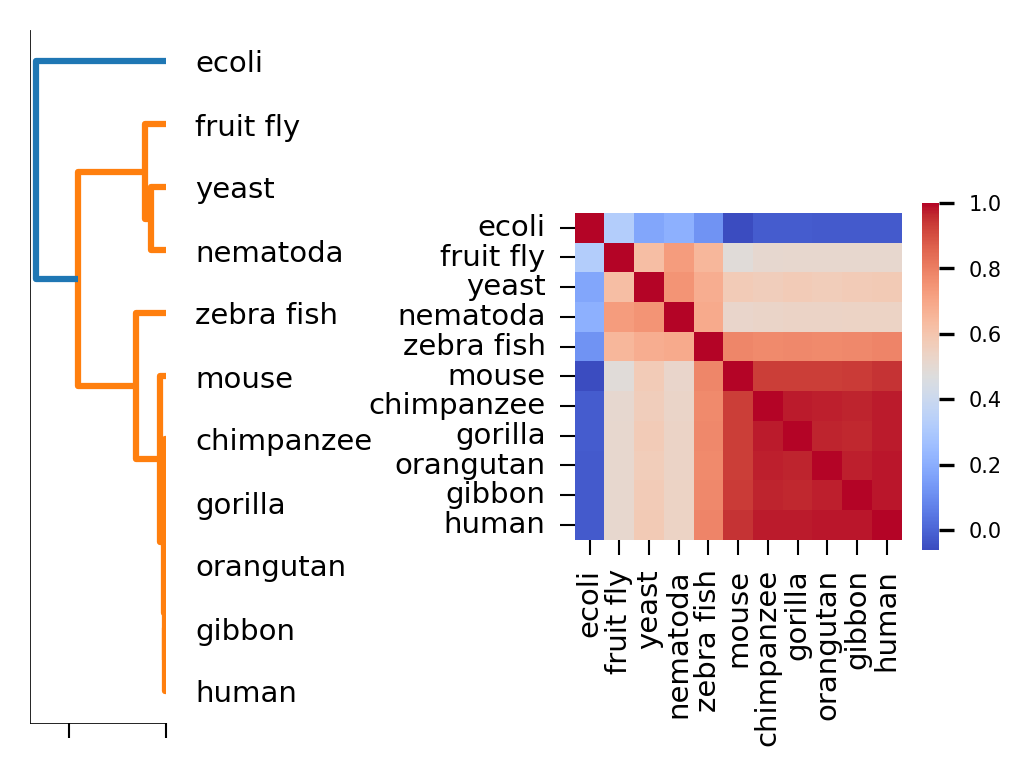

In [7]:

# Perform hierarchical clustering
row_linkage = sch.linkage(df, method="ward")
col_linkage = sch.linkage(df.T, method="ward")

# Create Dendrograms
fig, ax = plt.subplots(1, 2, figsize=(4.1, 3), gridspec_kw={'width_ratios': [1, 3], 'wspace': 1.5}, dpi = 300)

# Row Dendrogram
sch.dendrogram(row_linkage, labels=df.index, ax=ax[0], orientation="left")
ax[0].invert_yaxis()  # Keep the labels readable
# ax[0].set_title("Row Dendrogram")

# Reorder the data based on clustering
row_order = sch.leaves_list(row_linkage)
col_order = sch.leaves_list(col_linkage)

df_reordered = df.iloc[row_order, col_order]

# Plot the clustered heatmap
ax[1] = sns.heatmap(df_reordered, cmap="coolwarm", annot=False, xticklabels=df_reordered.columns, yticklabels=df_reordered.index, ax= ax[1], square = True, fmt='0.2f',       annot_kws={"size": 4},
                cbar_kws={"shrink": 0.5},)

ax[0] = utility.custom_figure_axis(ax=ax[0], fontsize = 7)
ax[1] =  utility.custom_figure_axis(ax=ax[1], fontsize = 7)

ax[0].set_xticklabels([])

# Adjust font size of colorbar text
cbar = ax[1].collections[0].colorbar
cbar.ax.tick_params(labelsize=5)
# ax[1].set_title("Heatmap of kmer frequency (-log(x) scale) \n correlation across species", fontsize = 8)

plt.tight_layout()
# plt.savefig("correlation heatmap.pdf", dpi = 300)
# plt.savefig("correlation heatmap.png", dpi = 300)

##### Only correlation heatmap

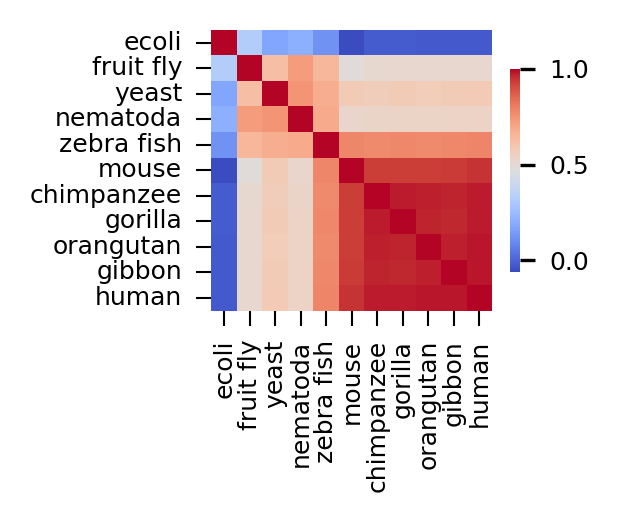

In [8]:
# Create Dendrograms
fig, ax = plt.subplots(1, 1, figsize=(2.1, 2.1),  dpi = 300)

# Plot the clustered heatmap
ax = sns.heatmap(df_reordered, cmap="coolwarm", annot=False, xticklabels=df_reordered.columns, yticklabels=df_reordered.index, ax= ax, square = True, fmt='0.2f',       annot_kws={"size": 4},
                cbar_kws={"shrink": 0.5},)
# ax.set_title("Heatmap of kmer frequency (-log(x) scale) \n correlation across species", fontsize = 8)

ax = utility.custom_figure_axis(ax=ax, fontsize = 6)

# Adjust font size of colorbar text
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=6)
# ax[1].set_title("Heatmap of kmer frequency (-log(x) scale) \n correlation across species", fontsize = 8)

plt.tight_layout()
# ax[1] =  utility.custom_figure_axis(ax=ax[1], fontsize = 7)
plt.savefig("correlation heatmap.pdf", dpi = 300)
# plt.savefig("correlation heatmap.png", dpi = 300)